In [1]:
!pip install gensim --upgrade
!pip install keras --upgrade
!pip install pandas --upgrade

Requirement already up-to-date: gensim in c:\users\utkarsh\anaconda3\lib\site-packages (3.8.1)


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\

Requirement already up-to-date: keras in c:\users\utkarsh\anaconda3\lib\site-packages (2.3.1)


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\

Requirement already up-to-date: pandas in c:\users\utkarsh\anaconda3\lib\site-packages (0.25.1)


ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _dep_map
    return self.__dep_map
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3003, in _parsed_pkg_info
    return self._pkg_info
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2806, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\utkarsh\Anaconda3\lib\site-packages\

In [2]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Using TensorFlow backend.


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utkarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# DATASET
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"

In [5]:
dataset_filename = os.listdir("Project Troll/sentiment140/")[0]
dataset_path = os.path.join("Project Troll","sentiment140",dataset_filename)
print("Open file:", dataset_path)
df = pd.read_csv(dataset_path, encoding =DATASET_ENCODING , names=DATASET_COLUMNS)

Open file: Project Troll\sentiment140\input.csv


In [6]:
print("Dataset size:", len(df))

Dataset size: 1600000


In [7]:
df.head(5)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
decode_map = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

In [9]:
%%time
df.target = df.target.apply(lambda x: decode_sentiment(x))

Wall time: 794 ms


Text(0.5, 1.0, 'Dataset labels distribuition')

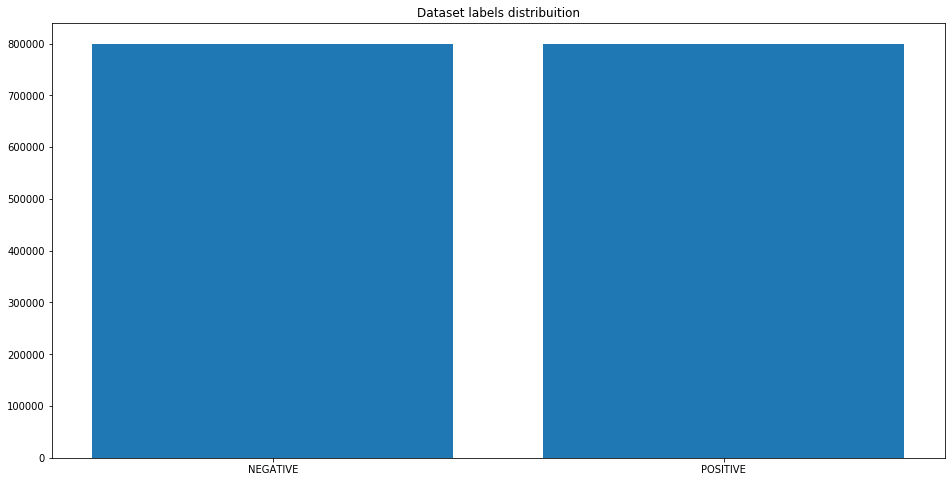

In [10]:
target_cnt = Counter(df.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [11]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [12]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [13]:
%%time
df.text = df.text.apply(lambda x: preprocess(x))

Wall time: 1min 3s


In [14]:
df_train, df_test = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 1280000
TEST size: 320000


In [17]:
#Word2Vec
documents = [_text.split() for _text in df_train.text] 

In [18]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)


In [19]:
w2v_model.build_vocab(documents)

2019-10-15 11:21:13,121 : INFO : collecting all words and their counts
2019-10-15 11:21:13,125 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-10-15 11:21:13,153 : INFO : PROGRESS: at sentence #10000, processed 72565 words, keeping 14005 word types
2019-10-15 11:21:13,185 : INFO : PROGRESS: at sentence #20000, processed 144393 words, keeping 21587 word types
2019-10-15 11:21:13,213 : INFO : PROGRESS: at sentence #30000, processed 215826 words, keeping 27541 word types
2019-10-15 11:21:13,241 : INFO : PROGRESS: at sentence #40000, processed 288271 words, keeping 32764 word types
2019-10-15 11:21:13,273 : INFO : PROGRESS: at sentence #50000, processed 359772 words, keeping 37587 word types
2019-10-15 11:21:13,305 : INFO : PROGRESS: at sentence #60000, processed 431431 words, keeping 42198 word types
2019-10-15 11:21:13,337 : INFO : PROGRESS: at sentence #70000, processed 503103 words, keeping 46458 word types
2019-10-15 11:21:13,365 : INFO : PROGRESS: at s

2019-10-15 11:21:15,415 : INFO : PROGRESS: at sentence #720000, processed 5193881 words, keeping 200325 word types
2019-10-15 11:21:15,455 : INFO : PROGRESS: at sentence #730000, processed 5265467 words, keeping 202133 word types
2019-10-15 11:21:15,487 : INFO : PROGRESS: at sentence #740000, processed 5337518 words, keeping 203818 word types
2019-10-15 11:21:15,519 : INFO : PROGRESS: at sentence #750000, processed 5409321 words, keeping 205535 word types
2019-10-15 11:21:15,547 : INFO : PROGRESS: at sentence #760000, processed 5481512 words, keeping 207282 word types
2019-10-15 11:21:15,583 : INFO : PROGRESS: at sentence #770000, processed 5554093 words, keeping 209076 word types
2019-10-15 11:21:15,611 : INFO : PROGRESS: at sentence #780000, processed 5625382 words, keeping 210805 word types
2019-10-15 11:21:15,639 : INFO : PROGRESS: at sentence #790000, processed 5698066 words, keeping 212618 word types
2019-10-15 11:21:15,679 : INFO : PROGRESS: at sentence #800000, processed 577088

In [20]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 30369


In [21]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

2019-10-15 11:22:28,881 : INFO : training model with 8 workers on 30369 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7
2019-10-15 11:22:29,987 : INFO : EPOCH 1 - PROGRESS: at 6.30% examples, 507601 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:22:30,987 : INFO : EPOCH 1 - PROGRESS: at 13.79% examples, 559824 words/s, in_qsize 16, out_qsize 0
2019-10-15 11:22:32,011 : INFO : EPOCH 1 - PROGRESS: at 21.46% examples, 579748 words/s, in_qsize 14, out_qsize 1
2019-10-15 11:22:33,019 : INFO : EPOCH 1 - PROGRESS: at 29.05% examples, 589835 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:22:34,078 : INFO : EPOCH 1 - PROGRESS: at 36.51% examples, 586680 words/s, in_qsize 16, out_qsize 0
2019-10-15 11:22:35,114 : INFO : EPOCH 1 - PROGRESS: at 44.51% examples, 594751 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:22:36,166 : INFO : EPOCH 1 - PROGRESS: at 52.51% examples, 600261 words/s, in_qsize 16, out_qsize 0
2019-10-15 11:22:37,174 : INFO : EPOCH 1 - PROGRESS: 

2019-10-15 11:23:21,730 : INFO : EPOCH 4 - PROGRESS: at 81.01% examples, 593260 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:23:22,790 : INFO : EPOCH 4 - PROGRESS: at 88.48% examples, 592198 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:23:23,789 : INFO : EPOCH 4 - PROGRESS: at 95.45% examples, 590476 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:23:24,453 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-10-15 11:23:24,489 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-10-15 11:23:24,493 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-10-15 11:23:24,517 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-10-15 11:23:24,521 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-10-15 11:23:24,521 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-10-15 11:23:24,533 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-10-15 11:23:24,5

2019-10-15 11:24:08,051 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-10-15 11:24:08,067 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-10-15 11:24:08,071 : INFO : EPOCH - 7 : training on 9227204 raw words (8222330 effective words) took 15.4s, 532829 effective words/s
2019-10-15 11:24:09,153 : INFO : EPOCH 8 - PROGRESS: at 7.27% examples, 560981 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:24:10,173 : INFO : EPOCH 8 - PROGRESS: at 15.52% examples, 608330 words/s, in_qsize 12, out_qsize 3
2019-10-15 11:24:11,191 : INFO : EPOCH 8 - PROGRESS: at 23.31% examples, 617115 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:24:12,189 : INFO : EPOCH 8 - PROGRESS: at 31.10% examples, 621930 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:24:13,197 : INFO : EPOCH 8 - PROGRESS: at 38.35% examples, 616133 words/s, in_qsize 13, out_qsize 2
2019-10-15 11:24:14,239 : INFO : EPOCH 8 - PROGRESS: at 46.13% examples, 617100 words/s, in_qsize 16, out_qsize

2019-10-15 11:24:58,958 : INFO : EPOCH 11 - PROGRESS: at 85.34% examples, 627437 words/s, in_qsize 14, out_qsize 1
2019-10-15 11:24:59,961 : INFO : EPOCH 11 - PROGRESS: at 92.83% examples, 626186 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:25:00,793 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-10-15 11:25:00,809 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-10-15 11:25:00,809 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-10-15 11:25:00,813 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-10-15 11:25:00,813 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-10-15 11:25:00,817 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-10-15 11:25:00,841 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-10-15 11:25:00,853 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-10-15 11:25:00,853 : INFO : EPOCH - 1

2019-10-15 11:25:45,210 : INFO : EPOCH - 14 : training on 9227204 raw words (8222776 effective words) took 15.1s, 543140 effective words/s
2019-10-15 11:25:46,234 : INFO : EPOCH 15 - PROGRESS: at 6.84% examples, 558857 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:25:47,262 : INFO : EPOCH 15 - PROGRESS: at 13.47% examples, 543222 words/s, in_qsize 14, out_qsize 1
2019-10-15 11:25:48,318 : INFO : EPOCH 15 - PROGRESS: at 20.05% examples, 533488 words/s, in_qsize 15, out_qsize 2
2019-10-15 11:25:49,338 : INFO : EPOCH 15 - PROGRESS: at 27.09% examples, 541959 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:25:50,359 : INFO : EPOCH 15 - PROGRESS: at 33.59% examples, 538474 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:25:51,364 : INFO : EPOCH 15 - PROGRESS: at 41.59% examples, 557447 words/s, in_qsize 14, out_qsize 1
2019-10-15 11:25:52,396 : INFO : EPOCH 15 - PROGRESS: at 47.97% examples, 550565 words/s, in_qsize 16, out_qsize 1
2019-10-15 11:25:53,400 : INFO : EPOCH 15 - PROGRESS: at 

2019-10-15 11:26:36,958 : INFO : EPOCH 18 - PROGRESS: at 85.99% examples, 634786 words/s, in_qsize 12, out_qsize 3
2019-10-15 11:26:37,977 : INFO : EPOCH 18 - PROGRESS: at 93.92% examples, 635191 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:26:38,640 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-10-15 11:26:38,644 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-10-15 11:26:38,644 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-10-15 11:26:38,649 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-10-15 11:26:38,651 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-10-15 11:26:38,652 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-10-15 11:26:38,662 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-10-15 11:26:38,673 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-10-15 11:26:38,674 : INFO : EPOCH - 1

2019-10-15 11:27:22,415 : INFO : EPOCH 22 - PROGRESS: at 39.54% examples, 631952 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:27:23,460 : INFO : EPOCH 22 - PROGRESS: at 47.22% examples, 627965 words/s, in_qsize 10, out_qsize 5
2019-10-15 11:27:24,490 : INFO : EPOCH 22 - PROGRESS: at 55.32% examples, 631073 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:27:25,485 : INFO : EPOCH 22 - PROGRESS: at 63.11% examples, 631988 words/s, in_qsize 13, out_qsize 2
2019-10-15 11:27:26,523 : INFO : EPOCH 22 - PROGRESS: at 71.02% examples, 631953 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:27:27,517 : INFO : EPOCH 22 - PROGRESS: at 78.73% examples, 631978 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:27:28,527 : INFO : EPOCH 22 - PROGRESS: at 86.96% examples, 635791 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:27:29,525 : INFO : EPOCH 22 - PROGRESS: at 94.58% examples, 634692 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:27:30,121 : INFO : worker thread finished; awaiting finish of 7 mo

2019-10-15 11:28:13,912 : INFO : EPOCH 25 - PROGRESS: at 86.85% examples, 539743 words/s, in_qsize 16, out_qsize 0
2019-10-15 11:28:14,920 : INFO : EPOCH 25 - PROGRESS: at 93.81% examples, 541554 words/s, in_qsize 14, out_qsize 1
2019-10-15 11:28:15,624 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-10-15 11:28:15,636 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-10-15 11:28:15,640 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-10-15 11:28:15,648 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-10-15 11:28:15,668 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-10-15 11:28:15,676 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-10-15 11:28:15,676 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-10-15 11:28:15,680 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-10-15 11:28:15,684 : INFO : EPOCH - 2

2019-10-15 11:28:59,890 : INFO : EPOCH 29 - PROGRESS: at 14.86% examples, 592951 words/s, in_qsize 14, out_qsize 1
2019-10-15 11:29:00,970 : INFO : EPOCH 29 - PROGRESS: at 22.11% examples, 579235 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:29:01,990 : INFO : EPOCH 29 - PROGRESS: at 29.16% examples, 576515 words/s, in_qsize 16, out_qsize 0
2019-10-15 11:29:02,994 : INFO : EPOCH 29 - PROGRESS: at 36.29% examples, 577904 words/s, in_qsize 16, out_qsize 0
2019-10-15 11:29:04,037 : INFO : EPOCH 29 - PROGRESS: at 43.11% examples, 571168 words/s, in_qsize 14, out_qsize 1
2019-10-15 11:29:05,044 : INFO : EPOCH 29 - PROGRESS: at 50.35% examples, 574224 words/s, in_qsize 16, out_qsize 2
2019-10-15 11:29:06,071 : INFO : EPOCH 29 - PROGRESS: at 57.60% examples, 575110 words/s, in_qsize 12, out_qsize 3
2019-10-15 11:29:07,087 : INFO : EPOCH 29 - PROGRESS: at 64.51% examples, 573631 words/s, in_qsize 16, out_qsize 0
2019-10-15 11:29:08,087 : INFO : EPOCH 29 - PROGRESS: at 71.78% examples, 575793

2019-10-15 11:29:49,992 : INFO : EPOCH 32 - PROGRESS: at 64.41% examples, 579584 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:29:51,004 : INFO : EPOCH 32 - PROGRESS: at 71.34% examples, 578057 words/s, in_qsize 14, out_qsize 1
2019-10-15 11:29:52,008 : INFO : EPOCH 32 - PROGRESS: at 78.07% examples, 575592 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:29:53,044 : INFO : EPOCH 32 - PROGRESS: at 84.69% examples, 571231 words/s, in_qsize 13, out_qsize 5
2019-10-15 11:29:54,050 : INFO : EPOCH 32 - PROGRESS: at 92.06% examples, 573400 words/s, in_qsize 15, out_qsize 0
2019-10-15 11:29:55,027 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-10-15 11:29:55,027 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-10-15 11:29:55,027 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-10-15 11:29:55,027 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-10-15 11:29:55,051 : INFO : worker thread finished; awai

Wall time: 7min 26s


(263124515, 295270528)

In [22]:
w2v_model.most_similar("love")

C:\Users\utkarsh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-10-15 11:29:55,099 : INFO : precomputing L2-norms of word weight vectors


[('luv', 0.5772371888160706),
 ('loves', 0.560002863407135),
 ('loved', 0.5447041392326355),
 ('adore', 0.5088313817977905),
 ('amazing', 0.5046148300170898),
 ('looove', 0.5006033778190613),
 ('loveee', 0.46513229608535767),
 ('awesome', 0.46487292647361755),
 ('lovee', 0.44180411100387573),
 ('loooove', 0.43684259057044983)]

In [24]:
#Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 290419


In [25]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=SEQUENCE_LENGTH)

Wall time: 35.3 s


In [26]:
#label Encoder
labels = df_train.target.unique().tolist()
labels.append(NEUTRAL)
labels

['POSITIVE', 'NEGATIVE', 'NEUTRAL']

In [27]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (1280000, 1)
y_test (320000, 1)


In [28]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (1280000, 300)
y_train (1280000, 1)

x_test (320000, 300)
y_test (320000, 1)


In [29]:
y_train[:10]

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]], dtype=int64)

In [30]:
#Embedding Layer
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
  if word in w2v_model.wv:
    embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(290419, 300)


In [31]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [32]:
# Build Model

model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


2019-10-15 11:31:19,435 : WARNING : From C:\Users\utkarsh\Anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          87125700  
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 87,286,201
Trainable params: 160,501
Non-trainable params: 87,125,700
_________________________________________________________________


In [33]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [34]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [37]:
#Train

history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=4,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Train on 1152000 samples, validate on 128000 samples
Epoch 1/4
1152000/1152000 [==============================] - 6352s 6ms/step - loss: 0.4944 - accuracy: 0.7571 - val_loss: 0.4607 - val_accuracy: 0.7808
Epoch 2/4


C:\Users\utkarsh\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1152000/1152000 [==============================] - 6347s 6ms/step - loss: 0.4814 - accuracy: 0.7658 - val_loss: 0.4567 - val_accuracy: 0.7838
Epoch 3/4
1152000/1152000 [==============================] - 6352s 6ms/step - loss: 0.4759 - accuracy: 0.7690 - val_loss: 0.4546 - val_accuracy: 0.7855
Epoch 4/4
1152000/1152000 [==============================] - 6354s 6ms/step - loss: 0.4726 - accuracy: 0.7712 - val_loss: 0.4506 - val_accuracy: 0.7879


In [39]:
#Evaluate

score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

320000/320000 [==============================] - 558s 2ms/step

ACCURACY: 0.7878531217575073
LOSS: 0.44944941329956056


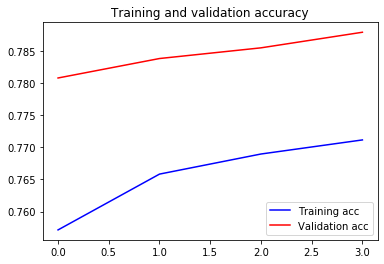

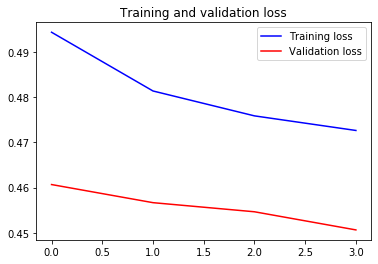

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [46]:
#Prediction

def decode_sentiment(score, include_neutral=True):
    if include_neutral:        
        label = NEUTRAL
        if score <= SENTIMENT_THRESHOLDS[0]:
            label = NEGATIVE
        elif score >= SENTIMENT_THRESHOLDS[1]:
            label = POSITIVE

        return label
    else:
        return NEGATIVE if score < 0.5 else POSITIVE

In [47]:
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]
    # Decode sentiment
    label = decode_sentiment(score, include_neutral=include_neutral)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [48]:
predict("I love the music")

{'label': 'POSITIVE',
 'score': 0.9721435308456421,
 'elapsed_time': 0.7315895557403564}

In [49]:
predict("I hate the rain")

{'label': 'NEGATIVE',
 'score': 0.00889394897967577,
 'elapsed_time': 0.05013227462768555}

In [50]:
predict("i don't know what i'm doing")

{'label': 'NEGATIVE',
 'score': 0.3632024824619293,
 'elapsed_time': 0.15047597885131836}

In [ ]:

y_pred_1d = []
y_test_1d = list(df_test.target)
scores = model.predict(x_test, verbose=1, batch_size=8000)
y_pred_1d = [decode_sentiment(score, include_neutral=False) for score in scores]

120000/320000 [==========>...................] - ETA: 4:06:48

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black
    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)             

In [ ]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=df_train.target.unique(), title="Confusion matrix")
plt.show()


In [ ]:
#Accuracy Score

accuracy_score(y_test_1d, y_pred_1d)

In [ ]:
model.save(KERAS_MODEL)
w2v_model.save(WORD2VEC_MODEL)
pickle.dump(tokenizer, open(TOKENIZER_MODEL, "wb"), protocol=0)
pickle.dump(encoder, open(ENCODER_MODEL, "wb"), protocol=0)